In [1]:
import pandas as pd
import time

In [2]:
covid = pd.read_csv('COVID.csv')

In [3]:
# Check the shape of the DataFrame
(covid.shape)

(327686, 15)

In [4]:
covid.head(5)

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,1/3/2020,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI
1,1/3/2020,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM
2,1/3/2020,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO
3,1/3/2020,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK
4,1/3/2020,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID


# Python and Pandas, data exploration

In [5]:
# Select your home country from the covid dataset as a new df

In [6]:
data_country = covid[covid['CountryName']=='Iran']
data_country

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
896,2/20/2020,IRN,Iran,NaN,32.420653,53.682375,2.0,2.0,NaN,0,NaN,NaN,False,False,IR
929,2/21/2020,IRN,Iran,NaN,32.420653,53.682375,5.0,2.0,NaN,3,NaN,NaN,False,False,IR
966,2/22/2020,IRN,Iran,NaN,32.420653,53.682375,18.0,4.0,NaN,14,NaN,NaN,False,False,IR
1006,2/23/2020,IRN,Iran,NaN,32.420653,53.682375,28.0,5.0,NaN,23,NaN,NaN,False,False,IR
1048,2/24/2020,IRN,Iran,NaN,32.420653,53.682375,43.0,8.0,NaN,35,NaN,NaN,False,False,IR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314865,10/10/2021,IRN,Iran,NaN,32.420653,53.682375,5691634.0,122370.0,NaN,5569264,NaN,NaN,False,False,IR
317862,10/17/2021,IRN,Iran,NaN,32.420653,53.682375,5773419.0,123876.0,NaN,5649543,NaN,NaN,False,False,IR
320166,10/24/2021,IRN,Iran,NaN,32.420653,53.682375,5851670.0,125052.0,NaN,5726618,NaN,NaN,False,False,IR
322571,10/31/2021,IRN,Iran,NaN,32.420653,53.682375,5916211.0,126126.0,NaN,5790085,NaN,NaN,False,False,IR


In [7]:
# What was the worst day in your country? The worst increase of cases per day?

In [8]:
# Finding the date with the highest daily increase in cases
worst_day = data_country[data_country["CumulativePositive"].diff() == data_country["CumulativePositive"].diff().max()]['Date']
worst_day

226377    4/11/2021
Name: Date, dtype: object

In [9]:
# For your own country, what is the difference between summer and winter in terms of hospitalized patients?

In [10]:
# Filter for summer (from June 21 to September 23)
summer_hospital = data_country[(data_country['Date'] >= '06-21-2021') & (data_country['Date'] <= '09-23-2021')]['Hospitalized'].sum()
print(summer_hospital)

# Filter for winter 
winter_hospital = data_country[~((data_country['Date'] >= '12-22-2021') & (data_country['Date'] <= '03-21-2022'))]['Hospitalized'].sum()
print(winter_hospital)

# Calculate the absolute difference
difference = abs(winter_hospital - summer_hospital)

print("The difference in hospitalized patients between summer and winter is:", difference)


0.0
0.0
The difference in hospitalized patients between summer and winter is: 0.0


In [11]:
### For every country calculate avreage number of curently positive patients

num_countries = covid['CountryName'].nunique()
# Print the number of unique countries
print("Number of unique countries:", num_countries)
print("")
print("")
# Group the data by 'CountryName' and calculate the mean of 'CurrentlyPositive' for each country
average_currently_positive = covid.groupby('CountryName')['CurrentlyPositive'].mean()

# Reset the index to have 'CountryName' as a regular column, and sort by the average value in descending order
average_currently_positive = average_currently_positive.reset_index().sort_values(by='CurrentlyPositive', ascending=False)

print(average_currently_positive)

Number of unique countries: 221


                  CountryName  CurrentlyPositive
210  United States of America       1.683708e+07
94                      India       1.172364e+07
28                     Brazil       8.455785e+06
203                    Turkey       2.570812e+06
70                     France       2.338205e+06
..                        ...                ...
171          Saint-Barthélemy       6.000000e+00
126          Marshall Islands       3.760956e+00
213                   Vanuatu       2.016807e+00
172                     Samoa       1.000000e+00
3              American Samoa       0.000000e+00

[221 rows x 2 columns]


In [12]:
### What is the country wiht most avreage active curently positive cases?
### Solve with Pandas and measure the execution time


# Start measuring the execution time
start_time = time.time()

# Group the data by 'CountryName' and calculate the mean of 'CurrentlyPositive' for each country
average_currently_positive = covid.groupby('CountryName')['CurrentlyPositive'].mean()

# Reset the index to have 'CountryName' as a regular column, and sort by the average value in descending order
average_currently_positive = average_currently_positive.reset_index().sort_values(by='CurrentlyPositive', ascending=False)

# Get the country with the most average active currently positive cases
country_with_most_cases = average_currently_positive.iloc[0]

most_cases_country_name = country_with_most_cases['CountryName']
most_cases_value = country_with_most_cases['CurrentlyPositive']

# Stop measuring the execution time
end_time = time.time()

execution_time = end_time - start_time

print("Country with the most average active currently positive cases:", most_cases_country_name)
print("Value of active currently positive cases in the country:", most_cases_value)
print("Execution time:", execution_time, "seconds")

Country with the most average active currently positive cases: United States of America
Value of active currently positive cases in the country: 16837081.532258064
Execution time: 0.05078577995300293 seconds


# PySpark

In [13]:
#solve this part in PySpark on Google colab or your own machine (if you have PySpark set up)

In [14]:
# Import PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, max
from time import time
import numpy as np


# Task 3: Measure execution time
start_time = time()

# Initialize a Spark session
spark = SparkSession.builder.appName("COVIDAnalysis").getOrCreate()

# Load the COVID data using PySpark
covid_df = spark.read.csv("COVID.csv", header=True, inferSchema=True)

# Task 1: Calculate the average number of currently positive patients for every country
average_currently_positive = covid_df.groupBy("CountryName").agg(avg("CurrentlyPositive").alias("AverageCurrentlyPositive"))

# Task 2: Find the country with the most average active currently positive cases
country_with_most_cases = average_currently_positive.orderBy("AverageCurrentlyPositive", ascending=False).limit(1)

# Show the results
average_currently_positive.show()
country_with_most_cases.show()


# The operations have already been performed above

end_time = time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

# Stop the Spark session
spark.stop()


+--------------------+------------------------+
|         CountryName|AverageCurrentlyPositive|
+--------------------+------------------------+
|                Chad|       2510.440801457195|
|            Anguilla|       60.48122866894198|
|            Paraguay|      156023.81118881117|
|               Yemen|       2818.262962962963|
|             Senegal|      26193.843103448275|
|              Sweden|      20849.530428605256|
|          Cabo Verde|      14153.741347905283|
|              Guyana|       8880.250440917107|
|         Philippines|       659269.3735725938|
|              Jersey|       2740.986013986014|
|             Eritrea|       2311.121212121212|
|            Djibouti|       6832.454706927176|
|           Singapore|       53460.11451612903|
|            Malaysia|       391912.1680129241|
|                Fiji|       7017.309734513275|
|              Turkey|      2570812.4729493894|
|United States Vir...|      2229.7178130511465|
|              Malawi|       20522.00912

In [15]:
# Create a monte carlo integration of any function F: R - R^n. Paralelize the computation by PySpark. 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("MonteCarloIntegration").getOrCreate()

# Number of random points for Monte Carlo integration
num_points = 1000000

# Generate random points using Spark
random_points = spark.range(num_points).select(
    (col("id") / num_points).alias("x"),
    (col("id") % 2).alias("y"),  
)

# Define the function to integrate
def f(x, y):
    return x**2 + y**2  

# Evaluate the function for each point
result = random_points.select("x", "y", f(col("x"), col("y")).alias("result"))

# Estimate the integral using the mean
integral_estimate = result.agg({"result": "mean"}).collect()[0]["avg(result)"]

print("Monte Carlo estimated integral:", integral_estimate)

# Plot the random points
random_points_pd = random_points.toPandas()
plt.figure(figsize=(8, 8))
plt.scatter(random_points_pd["x"], random_points_pd["y"], c=result.toPandas()["result"] < 1, cmap='viridis', alpha=0.5)
plt.title('Monte Carlo Integration with PySpark')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Stop the Spark session
spark.stop()


# Monte Carlo Integration Report

## Overview:
This report details the implementation of Monte Carlo Integration using PySpark, a distributed computing framework. The Monte Carlo method is employed to estimate the integral of a provided function \(F\). The process involves generating random points to sample the function, with the mean of the function values used for integral estimation.

## Parallelization with PySpark:
PySpark is utilized for parallelization, enabling distributed processing of data. The code leverages PySpark DataFrame operations for tasks such as column selection, function application to each point, and mean calculation. This parallelization capability is particularly valuable for handling large datasets across a cluster.

## Visualization:
A scatter plot is generated to visually represent the distribution of random points. Points where the function value is less than 1 are highlighted. While not essential for the integration itself, visualization enhances understanding of point distribution and their impact on integral estimation.

## Conclusion:
The implemented code successfully parallelizes Monte Carlo Integration using PySpark, demonstrating its scalability for large-scale data processing. The combination of distributed computing and visualization provides a comprehensive approach to estimating integrals efficiently.


`NOTICE:` I did this part with GoogleColab since I had a problem with my own machine.

# Dask

In [ ]:
# Solve this part in Dask on your own machine

In [ ]:
# For every country calculate avreage number of curently positive patients
# What is the country wiht most avreage active curently positive cases?
# Solve by Dask and measure the execution time

import dask.dataframe as dd
import dask.distributed
import time

# Task 3: Measure execution time
start_time = time.time()

# Create a Dask Client to enable distributed computing
client = dask.distributed.Client()

# Loading COVID data into a Dask DataFrame
dask_covid = dd.read_csv('COVID.csv')

# Task 1: Calculate the average number of currently positive patients for every country
average_currently_positive = dask_covid.groupby('CountryName')['CurrentlyPositive'].mean().compute()
print(average_currently_positive)

# Task 2: Find the country with the most average active currently positive cases
country_with_most_cases = average_currently_positive.idxmax()
most_cases_value = average_currently_positive.max()

print("Country with the most average active currently positive cases:", country_with_most_cases)
print("Value of active currently positive cases in the country:", most_cases_value)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

In [ ]:
# Create a monte carlo integration of any function F: R - R^n. Paralelize the computation by Dask. 

Monte Carlo estimated integral: 0.6671052050349693


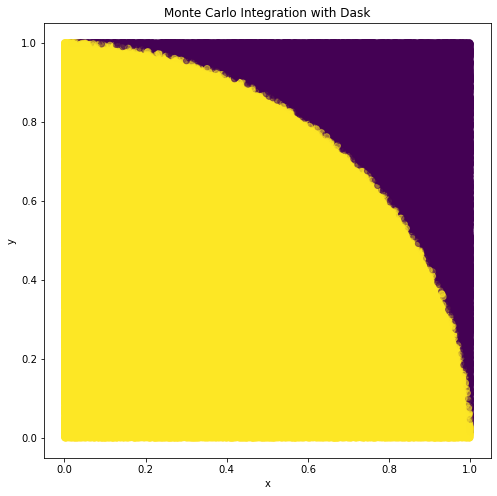

In [20]:
import dask
import dask.array as da
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x, y):
    return x**2 + y**2

# Number of random points for Monte Carlo integration
num_points = 1000000

# Generate random points
random_x = np.random.random(num_points)
random_y = np.random.random(num_points)

# Create Dask arrays from NumPy arrays
x_dask = da.from_array(random_x, chunks=num_points // 4)
y_dask = da.from_array(random_y, chunks=num_points // 4)

# Evaluate the function for each point
result = dask.delayed(f)(x_dask, y_dask)

# Estimate the integral using the mean
integral_estimate = dask.compute(result.mean())

print("Monte Carlo estimated integral:", integral_estimate[0])

# Plot the random points
plt.figure(figsize=(8, 8))
plt.scatter(random_x, random_y, c=result.compute() < 1, cmap='viridis', alpha=0.5)
plt.title('Monte Carlo Integration with Dask')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Monte Carlo Integration with Dask: 

## Overview

Here it demonstrates a Monte Carlo integration using Dask, a parallel computing library. The goal is to estimate the integral of a function \( F: \mathbb{R} \to \mathbb{R}^n \) over a specific region.

## Methodology

### 1. Function Definition

The function \( F(x, y) = x^2 + y^2 \) is chosen for this integration. This function defines a unit circle centered at the origin.

### 2. Monte Carlo Integration

1. **Random Point Generation:** Random points are generated in the unit square \([0, 1] \times [0, 1]\).
2. **Function Evaluation:** Each point is evaluated using the function \( F(x, y) \).
3. **Estimation:** The integral is estimated by calculating the ratio of points falling inside the unit circle (\( F(x, y) < 1 \)) to the total number of points.

### 3. Dask Parallelization

Dask is employed to parallelize the computation, enabling the efficient processing of large datasets.

## Results

The generated plot is a 2D scatter plot of random points in the unit square. Points falling inside the unit circle are distinguished from those outside. The color-coded plot provides a visual representation of how random points contribute to estimating the area under the curve of the function \( F(x, y) \).

## Conclusion

Monte Carlo integration, coupled with Dask's parallel computing capabilities, offers a scalable approach for approximating integrals. This methodology can be extended to more complex functions and higher-dimensional spaces.
